In [266]:
import pandas as pd
import numpy as np 

In [267]:
input_x = np.array([0,0,0,0,1,1,1,1,1,1,0.5,0.45,0.5,0.55,0.9,0.1,0.12, 0.2,0.3,0.5,0.49])
real_output = np.array([0,0,0,0,0,0,0,0,0,0,1,0.9,1,0.9,0.05,0.1,0.1,0.2,0.2,1,0.9])

len(input_x)==len(real_output)

True

In [268]:
#read from csv 
data = pd.read_csv("sample.csv",header=None)

In [269]:
input_x = np.array(data[0]).reshape(len(data[0]),1)
y_true = np.array(data[1]).reshape(len(data[1]),1)

In [270]:
x0 = input_x.T # as we need input_variable to number of observation 
y_true = y_true.T #same as above, each coloum represent unique output of observation 

In [271]:
x0.shape, y_true.shape

((1, 60), (1, 60))

In [272]:
y_true

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
        0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.9 ,
        0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ,
        0.9 , 0.9 , 0.9 , 0.9 , 0.9 ]])

In [273]:
def intialize () : 

    # shape is (output , input ) for each layer
    w1 = np.random.rand(3,1) # as we have two nodes and each node getting 1 input observation
    b1 = np.random.rand(3,1) # same as above for bias of hidden layer 1
    w2 = np.random.rand(3,3) # hidden layer 2 with 3 nodes 
    b2 = np.random.rand(3,1) # hiddedn layer 2 with 3 nodes 
    w3 = np.random.rand(1,3) # we are getting two output from second layer and converting into one output
    b3 = np.random.rand() # one bias to added 

    return w1,b1,w2,b2,w3,b3

In [274]:
def activation (x): 
    return (np.log(1+np.exp(x)))


def derivative_act (a) : 
    return np.exp(a)/(1+np.exp(a))
    



In [275]:
w1, b1,w2,b2,w3,b3 = intialize ()

In [276]:
w2.shape

(3, 3)

In [277]:
Z1 = np.dot(w1,x0)+b1

In [278]:
A1 = activation(Z1)
A1.shape

(3, 60)

In [279]:
Z2 = w2.dot(A1)+b2

In [280]:
Z2.shape

(3, 60)

In [281]:
def forward (w1,b1,w2,b2,w3,b3,X) : 
    Z1 = np.dot(w1,X)+b1
    A1 = activation(Z1)
    Z2 = w2.dot(A1)+b2
    A2 = activation(Z2)
    Z3 = w3.dot(A2)+b3
    return Z1, A1,Z2,A2,Z3

In [282]:
Z1, A1, Z2,A2,Z3  = forward (w1,b1,w2,b2,w3,b3,x0)
Z3.shape

(1, 60)

In [283]:
a = np.array ([[2,1],[3,4]])
a

array([[2, 1],
       [3, 4]])

In [284]:
b = np.array ([[2,1],[3,4]])

In [285]:
a*b

array([[ 4,  1],
       [ 9, 16]])

In [286]:
x0.shape

(1, 60)

In [287]:
Z1, A1, Z2,A2,Z3  = forward (w1,b1,w2,b2,w3,b3,x0)

In [288]:
Z3

array([[1.91243662, 1.91243662, 1.91243662, 1.91243662, 1.91243662,
        1.91243662, 1.91243662, 1.91243662, 1.91243662, 1.91243662,
        2.32003973, 2.32003973, 2.32003973, 2.32003973, 2.32003973,
        2.32003973, 2.32003973, 2.32003973, 2.10691551, 2.10691551,
        2.10691551, 2.10691551, 2.10691551, 2.10691551, 2.10691551,
        2.10691551, 1.94971668, 1.94971668, 1.94971668, 1.94971668,
        1.94971668, 1.94971668, 1.94971668, 2.27605801, 2.27605801,
        2.27605801, 2.27605801, 2.27605801, 2.27605801, 2.27605801,
        2.27605801, 2.27605801, 2.27605801, 2.086584  , 2.086584  ,
        2.086584  , 2.086584  , 2.086584  , 2.086584  , 2.086584  ,
        2.086584  , 2.12743393, 2.12743393, 2.12743393, 2.12743393,
        2.12743393, 2.12743393, 2.12743393, 2.12743393, 2.12743393]])

In [289]:
dZ3 = 2*(Z3-y_true)
dZ3
dw3 = dZ3.dot(A2.T)/60
dw3


array([[ 9.13447702,  9.94408983, 10.00611573]])

In [290]:
dZ2 = w3.T.dot(dZ3)*derivative_act (Z2)
dZ2.shape

(3, 60)

In [291]:
def backward (Z1, A1, Z2, A2,Z3, w1, w2, w3, X,Y) : 
    m = X.shape[1]
    dZ3 = 2*(Z3-Y)
    dw3 = dZ3.dot(A2.T)/m
    db3 = np.sum(dZ3)/m
    dZ2 = w3.T.dot(dZ3)*derivative_act (Z2)
    dw2 = dZ2.dot(A1.T)/m
    db2 = np.sum(dZ2)/m
    dZ1 = w2.T.dot(dZ2)*derivative_act (Z1)
    dw1 = dZ1.dot(X.T)/m
    db1 = np.sum(dZ1)/m


    return dZ3, dw3, db3, dZ2, dw2,db2,dZ1,dw1,db1


In [292]:
def update (w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,learning_rate):
    w1 = w1 -learning_rate*dw1
    b1 = b1 -learning_rate*db1
    w2 = w2 -learning_rate*dw2
    b2 = b2 -learning_rate*db2
    w3 = w3 -learning_rate*dw3
    b3 = b3 -learning_rate*db3
    return w1,b1,w2,b2,w3,b3

In [293]:
def ssr (y_pred ,y_true ) : 
    return np.sum((y_pred-y_true)**2)

In [312]:
def gradient_descent (X,Y, learning_rate, iteration): 

    w1, b1,w2,b2,w3,b3 = intialize ()
    old_ssr = 1000000000
    for i in range (iteration): 
        Z1, A1,Z2,A2,Z3  = forward (w1,b1,w2,b2,w3,b3,X)
        dZ3, dw3, db3, dZ2, dw2,db2,dZ1,dw1,db1 = backward (Z1, A1, Z2, A2,Z3, w1, w2, w3, X,Y)
        w1,b1,w2,b2,w3,b3 = update(w1,b1,w2,b2,w3,b3,dw1,db1,dw2,db2,dw3,db3,learning_rate)
        new_ssr = ssr(Z2,Y)
        #if old_ssr < new_ssr : 
        #    print (ssr , i)
        #    break
        #else : 
        #    old_ssr = new_ssr
        if i % 2 == 0 : 
            print ("iteration", i)
            print ("ssr", new_ssr)
            if (new_ssr) < 1 : 
                break
    return w1,b1,w2,b2,w3,b3


In [322]:
w1,b1,w2,b2,w3,b3 = gradient_descent (x0,y_true, 0.1, 100000)

iteration 0
ssr 486.82620406223305
iteration 2
ssr 581.2033518408695
iteration 4
ssr 746.7501750056792
iteration 6
ssr 818.5902458573547
iteration 8
ssr 855.2532454224461
iteration 10
ssr 875.1110511842543
iteration 12
ssr 886.1778734188167
iteration 14
ssr 892.4390720362508
iteration 16
ssr 896.0112861377173
iteration 18
ssr 898.0594120035331
iteration 20
ssr 899.2374262608232
iteration 22
ssr 899.9166353440371
iteration 24
ssr 900.3092170393867
iteration 26
ssr 900.5368663654199
iteration 28
ssr 900.6695304342691
iteration 30
ssr 900.747462402754
iteration 32
ssr 900.7938436111011
iteration 34
ssr 900.8220294402881
iteration 36
ssr 900.8397161338177
iteration 38
ssr 900.8513394046133
iteration 40
ssr 900.8594559887823
iteration 42
ssr 900.8655396667637
iteration 44
ssr 900.8704400048974
iteration 46
ssr 900.8746467562827
iteration 48
ssr 900.8784422619992
iteration 50
ssr 900.8819892993486
iteration 52
ssr 900.8853817214213
iteration 54
ssr 900.888673648516
iteration 56
ssr 900.89189

(1, 1000) (3, 1000)


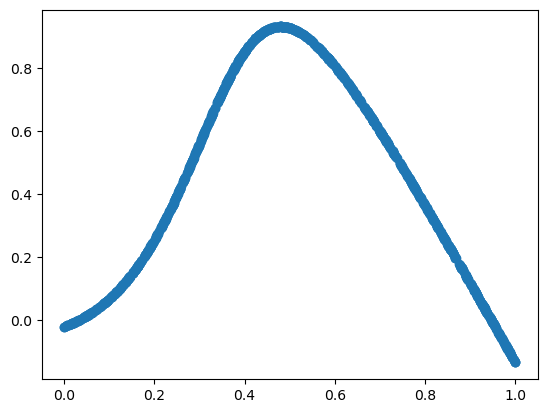

In [323]:
import matplotlib.pyplot as plt
#x = []
y = []
x = np.random.rand(1,1000)
Z1, A1,Z2,A2,Z3  = forward (w1,b1,w2,b2,w3,b3,x)

print (x.shape, Z2.shape)


plt.scatter(x,Z3)

In [321]:
forward (w1,b1,w2,b2,w3,b3,0.95)

(array([[3.39799679],
        [0.75566202],
        [0.74281826]]),
 array([[3.43089002],
        [1.14072002],
        [1.13199895]]),
 array([[7.00124743],
        [0.65929884],
        [5.90020231]]),
 array([[7.00215776],
        [1.07617451],
        [5.90293745]]),
 array([[0.02806712]]))

0.19411038823854973

array([[1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.63102328],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.85278236],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.7333444 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.6500368 ],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.82763191],
       [1.72230992],
       [1.72230992],
       [1.72230992],
       [1.72230992],
       [1.722

In [41]:
ssr(y_pred,y_ture)

119.71666584908803

In [46]:
db3, dw3 = backpropgation (w1,w2,w3,w4,b1,b2,b3,input_x,y_pred,y_ture)

In [47]:
dw3

123.41492748648261

In [214]:
np.log(np.exp(1))

1.0

In [216]:
activation(0.1)

0.744396660073571

In [234]:
#neural_network
w_1 = np.random.rand() #input to node1
w_1
w_2 = np.random.rand() #input to node2
w_3 = np.random.rand() #node1 to output 
w_4 = np.random.rand() #node2 to output

# add 3 node 


beta1 = 0.1
beta2 = 0.1

pred_y = np.zeros(len(input_x))
a1_raw_table = np.zeros(len(input_x))
a2_raw_table = np.zeros(len(input_x))
a1_table = np.zeros(len(input_x))
a2_table = np.zeros(len(input_x))
a1_derivative_component = np.zeros(len(input_x))
a2_derivative_component = np.zeros(len(input_x))
beta3 =1.158947660621694
step_size = 0.0005
steps = 0 
ssr = 1
while ssr > 0.1 and steps < 50000 : 
    for i in range(len(input_x)):
        #print (input_x[i])
        a1_raw = input_x[i]*w_1+beta1
        #print(a1_raw)
        a1_raw_table[i] = a1_raw

        a2_raw = input_x[i]*w_2 + beta2
        #print (a2_raw)
        a2_raw_table[i] = a2_raw
        a1 = activation(a1_raw)
        a1_derivative_component[i] = np.exp(a1_raw)/(1+np.exp(a1_raw))
        a1_table[i] = a1
        a2 = activation (a2_raw)
        a2_derivative_component[i] =  np.exp(a2_raw)/(1+np.exp(a2_raw))
        a2_table[i] = a2

        #print (a1, a2)
        output_predicted = w_3*a1+w_4*a2+beta3

        pred_y[i] = output_predicted
        #print (output_predicted)

    #print(a1_raw_table)
    #print (a2_raw_table)
    ssr =0 
    for i in range(len(pred_y)) : 
        ssr += (pred_y[i] - real_output[i])**2
    print ("SSR", np.sum(ssr))
    #get derivatives 
    d_ssr_d_b3 = np.sum(-2*(real_output-pred_y)*1)
    d_ssr_d_w4 = np.sum(-2*(real_output-pred_y)*a2_table)
    d_ssr_d_w3 = np.sum(-2*(real_output-pred_y)*a1_table)
    d_ssr_d_w1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*input_x)
    d_ssr_d_w2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*input_x)
    d_ssr_d_b1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*1)
    d_ssr_d_b2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*1)
    #get right step_size 

    
    #update weight and biases 

    beta3 = beta3 -d_ssr_d_b3*step_size
    w_4 = w_4-d_ssr_d_w4*step_size
    w_3 =w_3 -d_ssr_d_w3*step_size
    w_1 = w_1-d_ssr_d_w1*step_size
    w_2 = w_2-d_ssr_d_w2*step_size
    beta1 =beta1 -d_ssr_d_b1*step_size
    beta2 = beta2 -d_ssr_d_b2*step_size

    #print (w_1,w_2,w_3,w_4,beta1,beta2,beta3)
    print(steps)
    steps += 1



SSR 835.4721490511594
0
SSR 769.298432736131
1
SSR 319.3118565382775
2
SSR 218.85104503496638
3
SSR 167.64567873196248
4
SSR 139.20110424972415
5
SSR 122.80672846667835
6
SSR 112.99345041953026
7
SSR 106.75036363278042
8
SSR 102.37456594973445
9
SSR 98.89552355466651
10
SSR 95.76187516947753
11
SSR 92.66655587433927
12
SSR 89.4499500415547
13
SSR 86.04715983714974
14
SSR 82.45810644665228
15
SSR 78.7267375938492
16
SSR 74.92210888985859
17
SSR 71.12038921193097
18
SSR 67.39086157142732
19
SSR 63.7886216383384
20
SSR 60.35335943693412
21
SSR 57.11131088068496
22
SSR 54.077893751651914
23
SSR 51.26006149610454
24
SSR 48.65829020352746
25
SSR 46.268264830789654
26
SSR 44.08228013558002
27
SSR 42.09036089867378
28
SSR 40.281126557632454
29
SSR 38.64244082158353
30
SSR 37.16188962100877
31
SSR 35.82712606528012
32
SSR 34.62611404761631
33
SSR 33.54729531598557
34
SSR 32.57969908824818
35
SSR 31.713008744071587
36
SSR 30.937596627464067
37
SSR 30.244535336557412
38
SSR 29.625591869371807
39


In [236]:
model(3)

0.2585149206230919

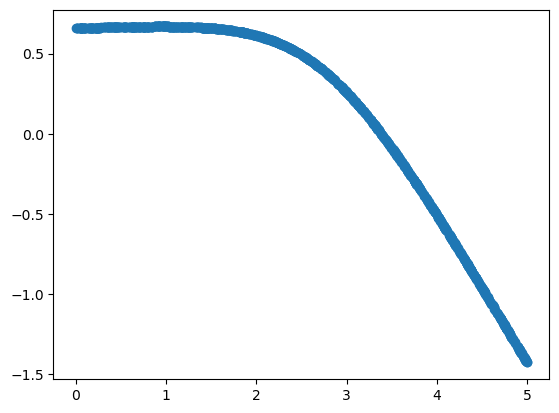

In [237]:
x = []
y = []
for i in range (1000) : 
    input = 5*np.random.rand()
    x.append(input)
    y.append(model(input))



plt.scatter(x,y)

In [221]:
ssr =0 
for i in range(len(pred_y)) : 
    ssr += (pred_y[i] - real_output[i])**2
np.sum(ssr)


33.15422078143679

In [222]:
a = np.array([2,3,4])
b = np.array([1,1,1])
c = np.array([2,3,5])


In [223]:
2*(a-b)*c

array([ 4, 12, 30])

In [224]:
#neural_network
w_1 = np.random.rand() #input to node1
w_1
w_2 = np.random.rand() #input to node2
w_3 = np.random.rand() #node1 to output 
w_4 = np.random.rand() #node2 to output

# add 3 node 
w_5 = np.random.rand() #input to node3
w_6 = np.random.rand() # node3 to output

beta1 = 0.1 #node 1 
beta2 = 0.1 #node 2
beta4 = 0.1 #node 3

pred_y = np.zeros(len(input_x))
a1_raw_table = np.zeros(len(input_x))
a2_raw_table = np.zeros(len(input_x))
a1_table = np.zeros(len(input_x))
a2_table = np.zeros(len(input_x))
a1_derivative_component = np.zeros(len(input_x))
a2_derivative_component = np.zeros(len(input_x))
a3_derivative_component = np.zeros(len(input_x))
a3_raw_table = np.zeros(len(input_x))
a3_table = np.zeros(len(input_x))
beta3 =1.158947660621694
step_size = 0.03
steps = 0 
ssr = 1
while ssr > 0.1 and steps < 100000 : 
    for i in range(len(input_x)):
        #print (input_x[i])
        a1_raw = input_x[i]*w_1+beta1
        #print(a1_raw)
        a1_raw_table[i] = a1_raw

        a2_raw = input_x[i]*w_2 + beta2
        #print (a2_raw)
        a2_raw_table[i] = a2_raw
        a1 = activation(a1_raw)
        a1_derivative_component[i] = np.exp(a1_raw)/(1+np.exp(a1_raw))
        a1_table[i] = a1
        a2 = activation (a2_raw)
        a2_derivative_component[i] =  np.exp(a2_raw)/(1+np.exp(a2_raw))
        a2_table[i] = a2

        a3_raw = input_x[i]*w_5+beta4
        a3_raw_table[i] = a3_raw

        a3 = activation(a3_raw)
        a3_derivative_component[i] = np.exp(a3_raw)/(1+np.exp(a3_raw))
        a3_table[i] = a3


        #print (a1, a2)
        output_predicted = w_3*a1+w_4*a2+beta3+w_6*a3

        pred_y[i] = output_predicted
        #print (output_predicted)

    #print(a1_raw_table)
    #print (a2_raw_table)
    ssr =0 
    for i in range(len(pred_y)) : 
        ssr += (pred_y[i] - real_output[i])**2
    print ("SSR", np.sum(ssr))
    #get derivatives 
    d_ssr_d_b3 = np.sum(-2*(real_output-pred_y)*1)
    d_ssr_d_w4 = np.sum(-2*(real_output-pred_y)*a2_table)
    d_ssr_d_w3 = np.sum(-2*(real_output-pred_y)*a1_table)
    #new w_6
    d_ssr_d_w6 = np.sum(-2*(real_output-pred_y)*a3_table)
    d_ssr_d_w1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*input_x)
    d_ssr_d_w2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*input_x)
    #new w_5
    d_ssr_d_w5 = np.sum(-2*(real_output-pred_y)*w_6*a3_derivative_component*input_x)
    d_ssr_d_b1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*1)
    d_ssr_d_b2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*1)
    d_ssr_d_b4 = np.sum(-2*(real_output-pred_y)*w_6*a2_derivative_component*1)

    #get right step_size 

    
    #update weight and biases 
    
    beta3 = beta3 -d_ssr_d_b3*step_size
    w_4 = w_4-d_ssr_d_w4*step_size
    w_3 =w_3 -d_ssr_d_w3*step_size
    w_1 = w_1-d_ssr_d_w1*step_size
    w_2 = w_2-d_ssr_d_w2*step_size
    beta1 =beta1 -d_ssr_d_b1*step_size
    beta2 = beta2 -d_ssr_d_b2*step_size
    w_5 = w_5- d_ssr_d_w5*step_size
    w_6 = w_6- d_ssr_d_w6*step_size
    beta4 = beta4 - d_ssr_d_b4*step_size

    #print (w_1,w_2,w_3,w_4,beta1,beta2,beta3)
    print(steps)
    steps += 1



SSR 1832.8511429858543
0
SSR 179393.01525338352
1
SSR 18728258.46810969
2
SSR 1956126399.1059732
3
SSR 204314265810.56543
4
SSR 21340298150698.145
5
SSR 2228959997352991.8
6
SSR 2.328113053875138e+17
7
SSR 2.43167683496372e+19
8
SSR 2.5398475472902475e+21
9
SSR 2.652830125583907e+23
10
SSR 2.770838620890379e+25
11
SSR 2.8940966061020657e+27
12
SSR 3.0228375995279117e+29
13
SSR 3.1573055073053014e+31
14
SSR 3.297755085492285e+33
15
SSR 3.444452422715324e+35
16
SSR 3.597675444287398e+37
17
SSR 3.7577144387510704e+39
18
SSR 3.924872607844479e+41
19
SSR 4.0994666409318214e+43
20
SSR 4.2818273149870364e+45
21
SSR 4.472300121266923e+47
22
SSR 4.671245919861334e+49
23
SSR 4.879041623360451e+51
24
SSR 5.096080910934018e+53
25
SSR 5.322774974176013e+55
26
SSR 5.559553296127266e+57
27
SSR 5.806864464952168e+59
28
SSR 6.065177023811109e+61
29
SSR 6.334980358538306e+63
30
SSR 6.616785624807557e+65
31
SSR 6.911126716541496e+67
32
SSR 7.21856127740012e+69
33
SSR 7.539671757263995e+71
34
SSR 7.875066

C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:65: RuntimeWarning: overflow encountered in scalar add
  ssr += (pred_y[i] - real_output[i])**2
C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:65: RuntimeWarning: overflow encountered in scalar power
  ssr += (pred_y[i] - real_output[i])**2


SSR inf
198
SSR inf
199
SSR inf
200
SSR inf
201
SSR inf
202
SSR inf
203
SSR inf
204
SSR inf
205
SSR inf
206
SSR inf
207
SSR inf
208
SSR inf
209
SSR inf
210
SSR inf
211
SSR inf
212
SSR inf
213
SSR inf
214
SSR inf
215
SSR inf
216
SSR inf
217
SSR inf
218
SSR inf
219
SSR inf
220
SSR inf
221
SSR inf
222
SSR inf
223
SSR inf
224
SSR inf
225
SSR inf
226
SSR inf
227
SSR inf
228
SSR inf
229
SSR inf
230
SSR inf
231
SSR inf
232
SSR inf
233
SSR inf
234
SSR inf
235
SSR inf
236
SSR inf
237
SSR inf
238
SSR inf
239
SSR inf
240
SSR inf
241
SSR inf
242
SSR inf
243
SSR inf
244
SSR inf
245
SSR inf
246
SSR inf
247
SSR inf
248
SSR inf
249
SSR inf
250
SSR inf
251
SSR inf
252
SSR inf
253
SSR inf
254
SSR inf
255
SSR inf
256
SSR inf
257
SSR inf
258
SSR inf
259
SSR inf
260
SSR inf
261
SSR inf
262
SSR inf
263
SSR inf
264
SSR inf
265
SSR inf
266
SSR inf
267
SSR inf
268
SSR inf
269
SSR inf
270
SSR inf
271
SSR inf
272
SSR inf
273
SSR inf
274
SSR inf
275
SSR inf
276
SSR inf
277
SSR inf
278
SSR inf
279
SSR inf
280
SSR 

c:\Users\Umesh\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:73: RuntimeWarning: overflow encountered in multiply
  d_ssr_d_w1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*input_x)
C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:73: RuntimeWarning: invalid value encountered in multiply
  d_ssr_d_w1 = np.sum(-2*(real_output-pred_y)*w_3*a1_derivative_component*input_x)
C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:74: RuntimeWarning: overflow encountered in multiply
  d_ssr_d_w2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*input_x)
C:\Users\Umesh\AppData\Local\Temp\ipykernel_8264\3226833496.py:74: RuntimeWarning: invalid value encountered in multiply
  d_ssr_d_w2 = np.sum(-2*(real_output-pred_y)*w_4*a2_derivative_component*input_x)
C:\Users\Umesh\

In [225]:
def model_3N(input):
    return  w_3*activation(w_1*input+beta1) + w_4*activation(w_2*input+beta2)+beta3 
+w_6*activation(w_5*input*beta4)

nan

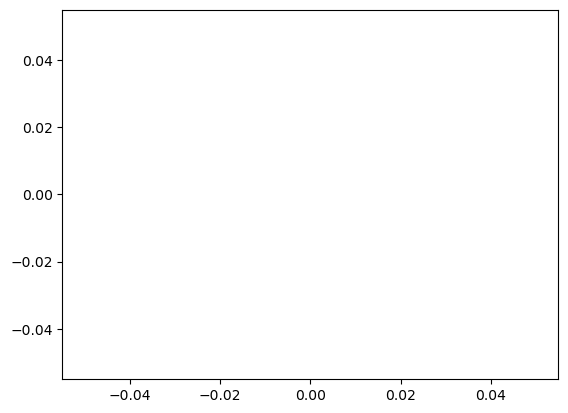

In [226]:
x = []
y = []
for i in range (1000) : 
    input = np.random.rand()
    x.append(input)
    y.append(model_3N(input))



plt.scatter(x,y)